# Multi-Modal Data Fusion - Project Work: Multi-Modal Physical Exercise Classification


In this project, real multi-modal data is studied by utilizing different techniques presented during the course. In addition, there is an optional task to try some different approaches to identify persons from the same dataset. Open MEx dataset from UCI machine learning repository is used. Idea is to apply different techniques to recognize physical exercises from wearable sensors and depth camera, user-independently.

## Author(s)
Add your information here

Name(s):Tanvir Hasan, Efta Bashar

Student number(s):2309496, 2307235

## Description

The goal of this project is to develop user-independent pre-processing and classification models to recognize 7 different physical exercises measured by accelerometer (attached to subject's thigh) and depth camera (above the subject facing downwards recording an aerial view). All the exercises were performed subject lying down on the mat. Original dataset have also another acceleration sensor and pressure-sensitive mat, but those two modalities are ommited in this project. There are totally 30 subjects in the original dataset, and in this work subset of 10 person is utilized. Detailed description of the dataset and original data can be access in [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#). We are providing the subset of dataset in Moodle.

The project work is divided on following phases:

1. Data preparation, exploration, and visualization
2. Feature extraction and unimodal fusion for classification
3. Feature extraction and feature-level fusion for multimodal classification
4. Decision-level fusion for multimodal classification
5. Bonus task: Multimodal biometric identification of persons

where 1-4 are compulsory (max. 10 points each), and 5 is optional to get bonus points (max. 5+5 points). In each phase, you should visualize and analyse the results and document the work and findings properly by text blocks and figures between the code. <b> Nice looking </b> and <b> informative </b> notebook representing your results and analysis will be part of the grading in addition to actual implementation.

The results are validated using confusion matrices and F1 scores. F1 macro score is given as
<br>
<br>
$
\begin{equation}
F1_{macro} = \frac{1}{N} \sum_i^N F1_i,
\end{equation}
$
<br>
<br>
where $F1_i = 2  \frac{precision_i * recall_i}{precision_i + recall_i}$, and $N$ is the number of classes.
<br>

## Learning goals

After the project work, you should  

- be able to study real world multi-modal data
- be able to apply different data fusion techniques to real-world problem
- be able to evaluate the results
- be able to analyse the outcome
- be able to document your work properly

## Relevant lectures

Lectures 1-8

## Relevant exercises

Exercises 0-6

## Relevant chapters in course book

Chapter 1-14

## Additional Material

* Original dataset [MEx dataset @ UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/MEx#)
* Related scientific article [MEx: Multi-modal Exercises Dataset for Human Activity Recognition](https://arxiv.org/pdf/1908.08992.pdf)

# 1. Data preparation, exploration, and visualization

<a id='task1'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 1.</b>

Download data from the Moodle's Project section. Get yourself familiar with the folder structure and data. You can read the data files using the function given below. Each file consists one exercise type performed by single user. Data are divided on multiple folders. Note that, in each folder there is one long sequence of single exercise, except exercise 4 which is performed two times in different ways. Those two sequences belongs to same class. Do the following subtasks to pre-analyse data examples and to prepare the training and testing data for next tasks:
<br>
<br>
<p> Read raw data from the files. Prepare and divide each data file to shorter sequences using windowing method. Similar to related article "MEx: Multi-modal Exercises Dataset for Human Activity Recognition", use 5 second window and 3 second overlapping between windows, producing several example sequences from one exercise file for classification purposes. Windowing is working so that starting from the beginning of each long exercise sequence, take 5 seconds of data points (from synchronized acceleration data and depth images) based on the time stamps. Next, move the window 2 seconds forward and take another 5 seconds of data. Then continue this until your are at the end of sequence. Each window will consists 500x3 matrix of acceleration data and 5x192 matrix of depth image data.</p>

</div>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Import relevant libraries here
from pathlib import Path
from copy import deepcopy
import numpy as np
import pandas as pd

# Enter data folder location
loc = "/content/drive/MyDrive/MEx"

In [2]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""
def path_to_meta(p):
    meta = dict()
    meta["subject_id"] = p.parent.stem
    meta["exercise_id"] = p.stem.split("_")[-2]
    meta["trial"] = int(p.stem.split("_")[-1])
    meta["sensor_code"] = p.stem.split("_")[0]
    meta["sensor"] = {"act": "acc", "dc": "dc"}[meta["sensor_code"]]
    return meta

# Find, read, and compose the measurements
paths_record = Path(loc).glob("*/*/*.csv")

records = []

for path_record in paths_record:
    df = pd.read_csv(path_record, delimiter=",", header=None)
    meta = path_to_meta(path_record)

    if meta["sensor"] == "acc":
        col_names = ["time", "acc_0", "acc_1", "acc_2"]
        df.columns = col_names
    else:
        num_cols = df.shape[1]
        col_names = ["time", ] + [f"dc_{i}" for i in range(num_cols-1)]
        df.columns = col_names

    meta["df"] = df

    records.append(meta)

df_records = pd.DataFrame.from_records(records)

print(f"Total records found: {len(df_records)}")
print("Dataframe with all records:")
display(df_records.head())
print("Dataframe with one measurement series:")
display(df_records["df"].iloc[0].head())

Total records found: 160
Dataframe with all records:


,subject_id,exercise_id,trial,sensor_code,sensor,df
0,10,05,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
1,10,03,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
2,10,07,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
3,10,06,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...
4,10,04,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...


Dataframe with one measurement series:


,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4429,0.8895,0.8895,0.8807,0.8735,0.8647,0.8589,0.8495,0.8437,...,0.9222,0.912,0.9055,0.8960,0.8858,0.8829,0.8713,0.8654,0.8567,0.8513
1,1000.0,0.4429,0.8895,0.8886,0.8815,0.8735,0.8647,0.8589,0.8495,0.8437,...,0.9222,0.912,0.9055,0.8960,0.8858,0.8822,0.8728,0.8661,0.8560,0.8513
2,2000.0,0.4429,0.8886,0.8877,0.8815,0.8735,0.8647,0.8589,0.8495,0.8437,...,0.9222,0.912,0.9055,0.8982,0.8858,0.8822,0.8728,0.8647,0.8567,0.8513
3,3000.0,0.4429,0.8877,0.8867,0.8800,0.8728,0.8647,0.8589,0.8495,0.8430,...,0.9222,0.912,0.9055,0.8975,0.8858,0.8822,0.8713,0.8661,0.8567,0.8513
4,4000.0,0.4429,0.8895,0.8895,0.8829,0.8735,0.8647,0.8589,0.8495,0.8437,...,0.9222,0.912,0.9055,0.8960,0.8858,0.8829,0.8713,0.8647,0.8575,0.8513


In [3]:
"""
    IMPORTANT: PLEASE DO NOT MODIFY THE CODE IN THIS CELL.
"""

# Extract 5-second long windows with 2-second shift (3-second overlap)

records_windowed = []

time_window = 5000.
time_offset = 2000.

for row_idx, row_data in df_records.iterrows():
    df_tmp = row_data["df"]
    time_start = np.min(df_tmp["time"].to_numpy())
    time_end = np.max(df_tmp["time"].to_numpy())

    for window_idx, t0 in enumerate(np.arange(time_start, time_end, time_offset)):
        t1 = t0 + time_window
        # Handle boundary conditions - skip the measurements from the end shorter than window size
        if t1 > time_end:
            continue

        tmp_data = deepcopy(row_data)
        tmp_data["window_idx"] = window_idx
        tmp_data["df"] = df_tmp[(df_tmp["time"] >= t0) &
                                (df_tmp["time"] < t1)].copy()

        records_windowed.append(tmp_data)

df_records_windowed = pd.DataFrame.from_records(records_windowed)

print(f"Total windows extracted: {len(df_records_windowed)}")
print("Dataframe with all windowed records:")
display(df_records_windowed.head())
print("Dataframe with one windowed measurement series:")
display(df_records_windowed["df"].iloc[0].head())

Total windows extracted: 4169
Dataframe with all windowed records:


,subject_id,exercise_id,trial,sensor_code,sensor,df,window_idx
0,10,05,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,0
1,10,05,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,1
2,10,05,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 d...,2
3,10,05,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,3
4,10,05,1,dc,dc,time dc_0 dc_1 dc_2 dc_3 ...,4


Dataframe with one windowed measurement series:


,time,dc_0,dc_1,dc_2,dc_3,dc_4,dc_5,dc_6,dc_7,dc_8,...,dc_182,dc_183,dc_184,dc_185,dc_186,dc_187,dc_188,dc_189,dc_190,dc_191
0,0.0,0.4429,0.8895,0.8895,0.8807,0.8735,0.8647,0.8589,0.8495,0.8437,...,0.9222,0.912,0.9055,0.8960,0.8858,0.8829,0.8713,0.8654,0.8567,0.8513
1,1000.0,0.4429,0.8895,0.8886,0.8815,0.8735,0.8647,0.8589,0.8495,0.8437,...,0.9222,0.912,0.9055,0.8960,0.8858,0.8822,0.8728,0.8661,0.8560,0.8513
2,2000.0,0.4429,0.8886,0.8877,0.8815,0.8735,0.8647,0.8589,0.8495,0.8437,...,0.9222,0.912,0.9055,0.8982,0.8858,0.8822,0.8728,0.8647,0.8567,0.8513
3,3000.0,0.4429,0.8877,0.8867,0.8800,0.8728,0.8647,0.8589,0.8495,0.8430,...,0.9222,0.912,0.9055,0.8975,0.8858,0.8822,0.8713,0.8661,0.8567,0.8513
4,4000.0,0.4429,0.8895,0.8895,0.8829,0.8735,0.8647,0.8589,0.8495,0.8437,...,0.9222,0.912,0.9055,0.8960,0.8858,0.8829,0.8713,0.8647,0.8575,0.8513


<a id='task1'></a>
<div class=" alert alert-warning">
     
<p> <b>1.1</b> Plot few examples of prepared data for each modalities (accelometer and depth camera). Plot acceleration sensor as multi-dimensional time-series and depth camera data as 2D image. Plot 5 second acceleration sensor and depth image sequences of person 1 and 5 performing exercises 2, 5, and 6. Take the first windowed example from the long exercise sequence. </p>

</div>

In [4]:
# extracting subset of data based on subject ID and exercise ID
def extract_subject(subject_id, exercise_id):
    subset_data = df_records_windowed[(df_records_windowed['subject_id'] == subject_id) & (df_records_windowed['exercise_id'] == exercise_id)]
    return subset_data

# extracting data for exercises 2, 5, and 6 for person 1
p1_2 = extract_subject('01', '02')
p1_5 = extract_subject('01', '05')
p1_6 = extract_subject('01', '06')

# extracting data for exercises 2, 5, and 6 for person 5
p5_2 = extract_subject('05', '02')
p5_5 = extract_subject('05', '05')
p5_6 = extract_subject('05', '06')

# Function to find indices based on the shape of the dataframes
def find_indices(df):
    for i in range(len(df)):
        if df['df'].iloc[i].shape[1] == 4:  # accelometer data has 4 columns
            idx1 = i
        elif df['df'].iloc[i].shape[1] == 193:  # depth camera data has 193 columns
            idx2 = i
        else:
            return 0, 0
    return idx1, idx2

print(p1_2.columns)


Index(['subject_id', 'exercise_id', 'trial', 'sensor_code', 'sensor', 'df',
       'window_idx'],
      dtype='object')


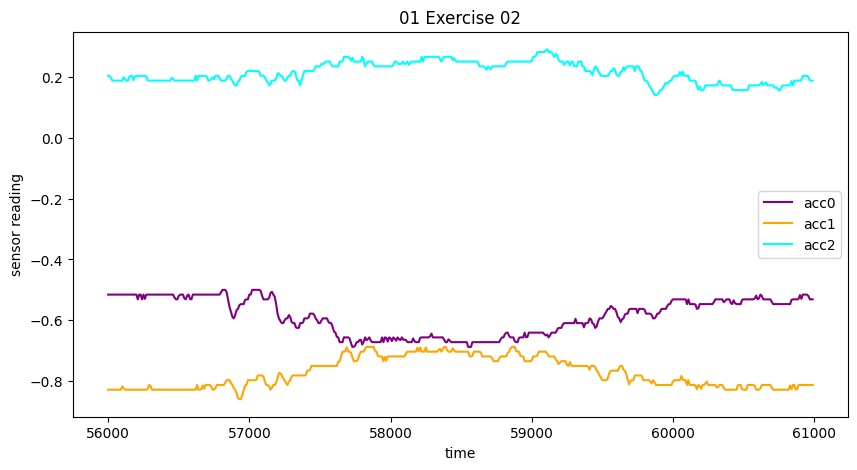

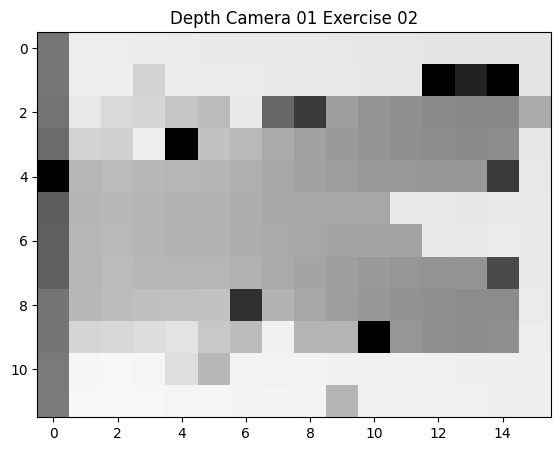

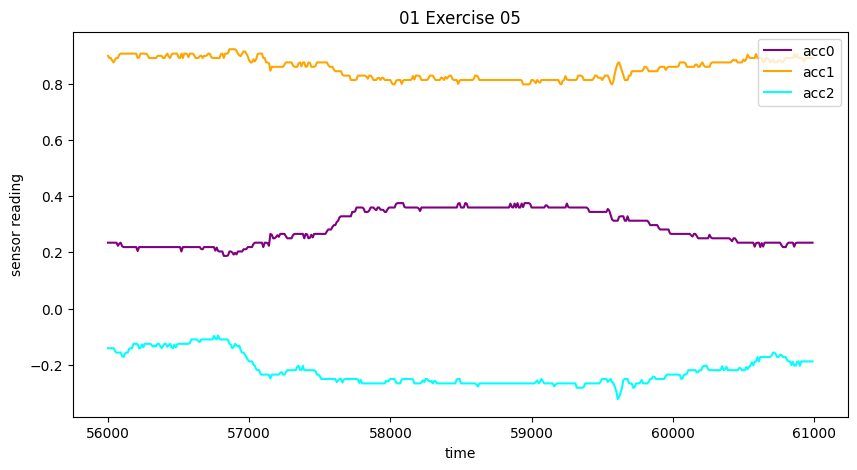

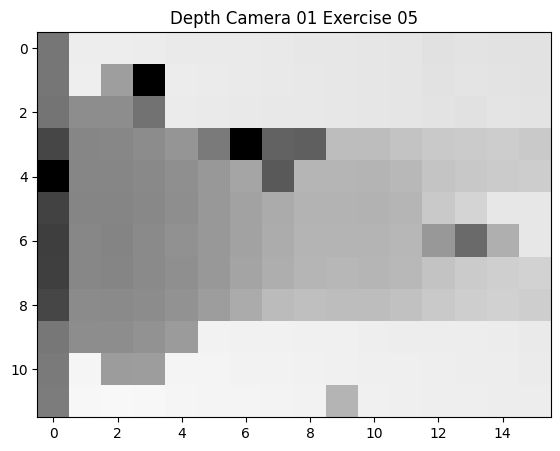

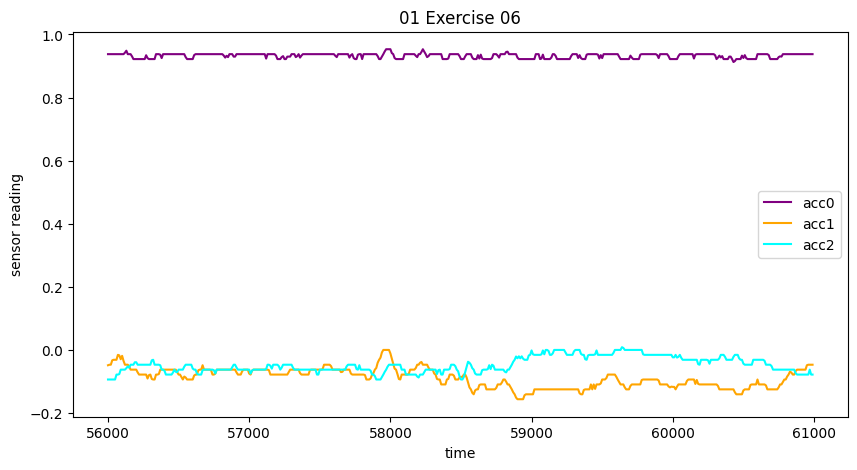

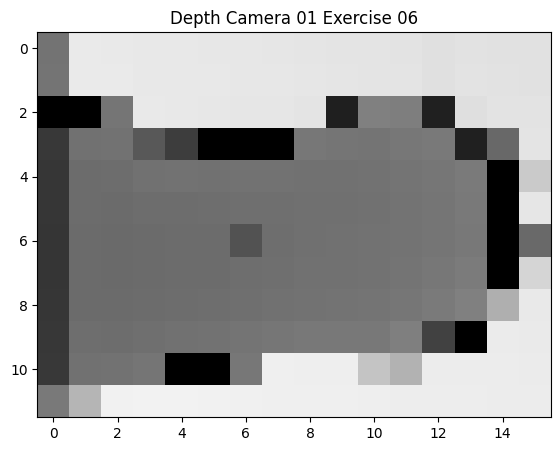

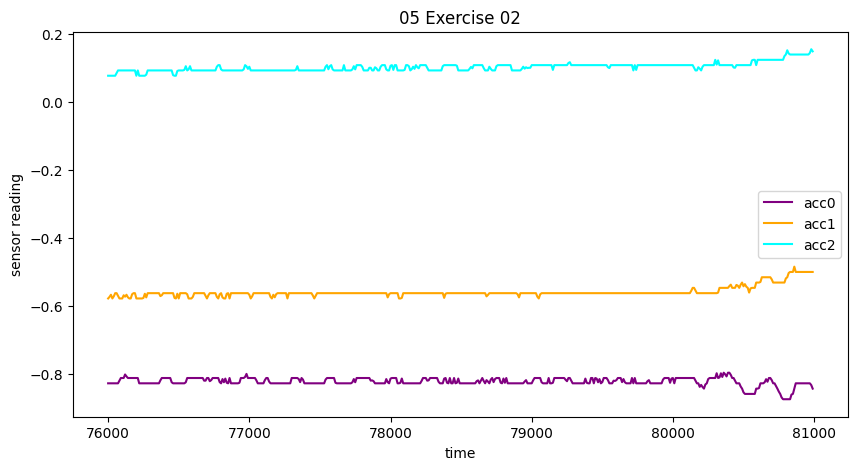

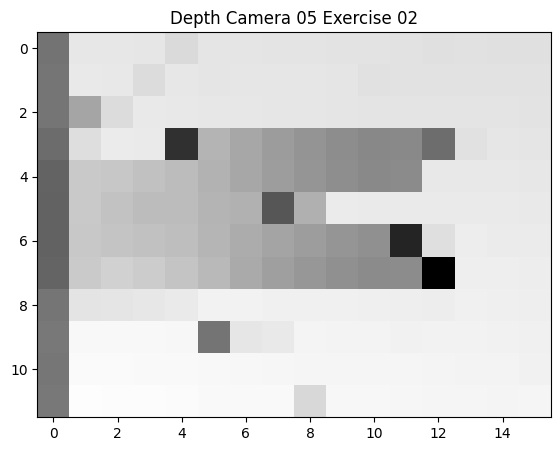

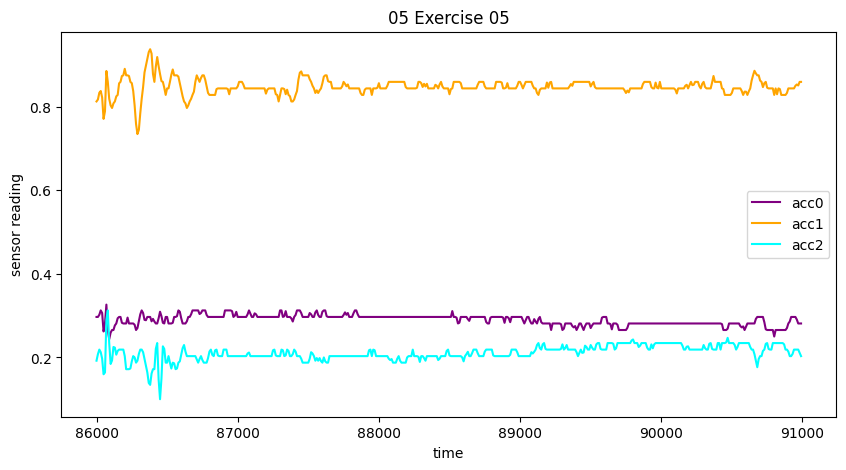

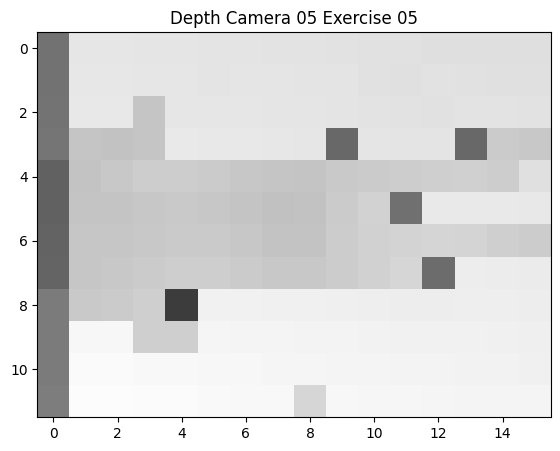

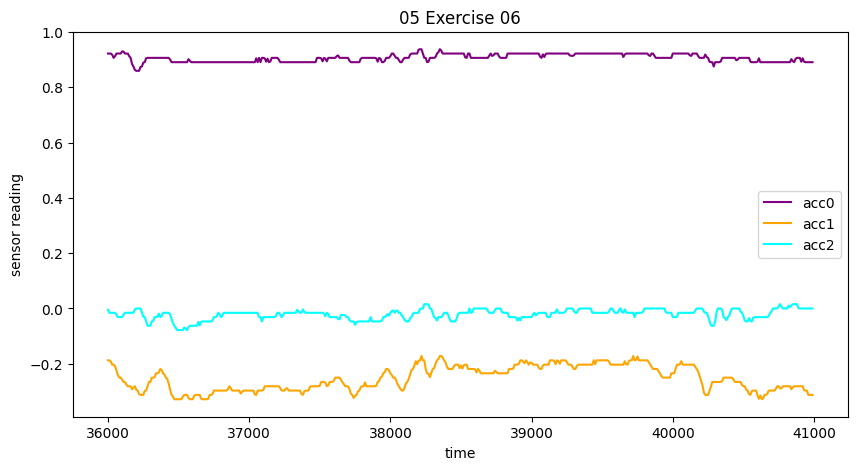

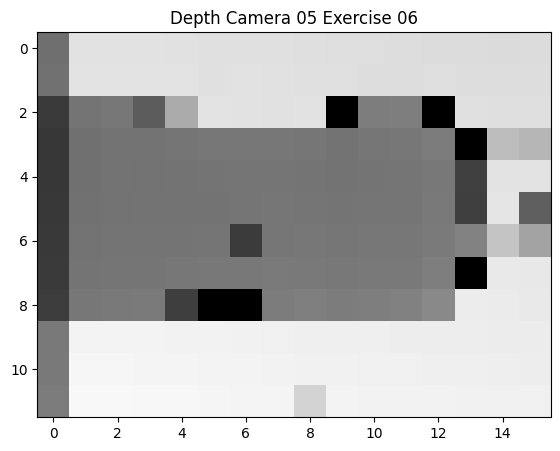

In [5]:
from PIL import Image
import matplotlib.pyplot as plt

def visualize_data(dataframe, index, plot_title):
    plt.figure(figsize=(10, 5))
    for i in range(3):  # there are always three accelerometer axes (acc0, acc1, acc2)
        plt.plot(dataframe['df'].iloc[index]['time'], dataframe['df'].iloc[index][f'acc_{i}'], color=['purple', 'orange', 'cyan'][i], label=f'acc{i}')
    plt.xlabel('time')
    plt.ylabel('sensor reading')
    plt.title(plot_title)
    plt.legend()

def visualize_depth_camera(dataframe, title):
    plt.figure(figsize=(10, 5))
    idx1, idx2 = find_indices(dataframe)
    temp_image = dataframe['df'].iloc[idx2].drop('time', axis=1)
    image = temp_image[temp_image.columns].values[0]
    image = image.reshape(12, 16)
    img = Image.fromarray((image * 255.0).astype('uint8'), mode='P')
    plt.imshow(img)
    plt.title(title)

datasets = [p1_2, p1_5, p1_6, p5_2, p5_5, p5_6]

def visualize_data_wrapper(dataset):
    index_1, index_2 = find_indices(dataset)
    visualize_data(dataset, index_1, f'{dataset["subject_id"].iloc[0]} Exercise {dataset["exercise_id"].iloc[0]}')
    visualize_depth_camera(dataset, f'Depth Camera {dataset["subject_id"].iloc[0]} Exercise {dataset["exercise_id"].iloc[0]}')

for dataset in datasets:
    visualize_data_wrapper(dataset)


<a id='task1'></a>
<div class=" alert alert-warning">

<p> <b>1.2</b> Split the prepared dataset to training and testing datasets so that data of persons 1-7 are used for training and data of persons 8-10 are used for testing. In next tasks, training dataset could be further divided on (multiple) validation data folds to tune the models parameters, when needed.<br>
    
<p> Note: Training set should have 1486 windows and testing set should have 598 windows. In training set, acceleration data will have a window without a pair with depth camera data, that window should be dropped as it doesn't have a pair.<p>
  
Document your work, calculate the indicator statistics of training and testing datasets (number of examples, dimensions of each example) and visualize prepared examples.

</div>

In [6]:
# 1.2. Split samples based on subject ID into training and testing datasets for futher experiments

### Your code begins here ###
train_subjects = ["01", "02", "03", "04", "05", "06", "07"]
test_subjects = ["08", "09", "10"]
# list of subject IDs for the test set
train_data_acc = df_records_windowed[(df_records_windowed['subject_id'].isin(train_subjects)) & (df_records_windowed['sensor'] == 'acc')]
train_data_dc = df_records_windowed[(df_records_windowed['subject_id'].isin(train_subjects)) & (df_records_windowed['sensor'] == 'dc')]

# print(len(train_data_acc), len(train_data_dc))
# print(train_data_acc.head())

# data for test set (subject 8 to 10)
test_data_acc = df_records_windowed[(df_records_windowed['subject_id'].isin(test_subjects)) & (df_records_windowed['sensor'] == 'acc')]
test_data_dc = df_records_windowed[(df_records_windowed['subject_id'].isin(test_subjects)) & (df_records_windowed['sensor'] == 'dc')]


train_data_acc = train_data_acc.reset_index(drop=True)
train_data_dc = train_data_dc.reset_index(drop=True)


# Merging train 'acc' and 'dc' data on common columns
train = pd.merge(train_data_acc, train_data_dc, how="inner", left_on=['subject_id', 'exercise_id', 'trial', 'window_idx'], right_on=['subject_id', 'exercise_id', 'trial', 'window_idx'])
# Merging testing 'acc' and 'dc' data on common columns
test = pd.merge(test_data_acc, test_data_dc, how="inner", left_on=['subject_id', 'exercise_id', 'trial', 'window_idx'], right_on=['subject_id', 'exercise_id', 'trial', 'window_idx'])


# Statistics about the train, test sets
print('Train data for acc:', len(train_data_acc))
print('Test data for acc:', len(test_data_acc))
print('Train data for dc:', len(train_data_dc))
print('Test data for dc:', len(test_data_dc))
print('Merged train data:', len(train))
print("dimension of train data:", train.shape)
print("dimension of test data:", test.shape)
print('Merged test data:', len(test))
# print('Dataframe records:', len(df_records))
print('Dataframe_records_windowed:', len(df_records_windowed))



Train data for acc: 1487
Test data for acc: 598
Train data for dc: 1486
Test data for dc: 598
Merged train data: 1486
dimension of train data: (1486, 10)
dimension of test data: (598, 10)
Merged test data: 598
Dataframe_records_windowed: 4169


# 2. Feature extraction and fusion for unimodal classification

<a id='task2'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 2.</b>

Use the training dataset prepared in task 1. to build models based on the combination of principal component analysis (PCA), linear discriminant analysis (LDA), and nearest neighbour (NN) classifier for each modality separately and evaluate the model on test dataset. Do the subtasks given as
<br>
<br>
<p> <b>2.1</b> Calculate PCA and LDA transformations to reduce the dimensionality of accelerometer data (e.g., using scikit-learn implementations). Before transformations downsample data from 100 Hz to 25 Hz (using scipy.signal.resample) to get 125x3 matrix of data for each 5 sec window. You should also standardize the values to zero mean and unit variance before the transformations. Using training dataset, fit PCA with 5-dimensional subspace (i.e., choosing the 5 largest principal components) and fit LDA with 5-dimensional subspace. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 3x(5+5). Perform the fusion of PCA and LDA similar manner as presented in Lecture 3 (pages 24-25) using NN method. Evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from scipy import signal
from sklearn import metrics
from scipy import stats



def drop_time_column(dataframes):
  for df in dataframes:
      for i in range(len(df['df'])):
          df['df'].iloc[i].drop('time', axis=1, inplace=True)



# applying drop_time_column function to the relevant DataFrames
drop_time_column([train_data_acc, test_data_acc, train_data_dc, test_data_dc])


In [8]:
scaler = StandardScaler()

def preprocess_and_concatenate(dataframe):
    processed_dataframes = []
    for i in range(len(dataframe['df'])):
        resampled_data = signal.resample(dataframe['df'].iloc[i], 125)
        reshaped_data = resampled_data.reshape(3, 125)

        zscored_data = stats.zscore(reshaped_data)
        #reshaped_data = scaler.fit_transform(reshaped_data)

        processed_df = pd.DataFrame(zscored_data)
        processed_df['target'] = dataframe.iloc[i]['exercise_id']

        processed_dataframes.append(processed_df)

    return pd.concat(processed_dataframes, axis=0)

# Preprocess and concatenate training accelerometer data
# Taking only the acc data which hace pair, i.e correspoinding dc data
# for i in range(len(train['df_x'])):
#   train['df_x'][i] = pd.DataFrame(scaler.fit_transform(train['df_x'][i]), columns=train['df_x'][i].columns)


# Preprocess and concatenate testing accelerometer data
train_accs = pd.DataFrame(train.drop(columns=['sensor_code_y', 'sensor_y', 'df_y', 'sensor_code_x', 'sensor_x']))
train_accs.rename(columns={'df_x':'df'}, inplace=True)
train_acc_df = preprocess_and_concatenate(train_accs)



In [9]:
# for i in range(len(test['df_x'])):
#   test['df_x'][i] = pd.DataFrame(scaler.fit_transform(test['df_x'][i]), columns=test['df_x'][i].columns)
#train.to_csv('/content/drive/MyDrive/strain.csv')

# Preprocess and concatenate testing accelerometer data
test_accs = pd.DataFrame(test.drop(columns=['sensor_code_y', 'sensor_y', 'df_y', 'sensor_code_x', 'sensor_x']))
test_accs.rename(columns={'df_x':'df'}, inplace=True)
test_acc_df = preprocess_and_concatenate(test_accs)

In [10]:
print(train_acc_df.shape)

print(test_acc_df.shape)

(4458, 126)
(1794, 126)


In [11]:
# PCA and LDA on training data
pca = PCA(n_components=5)
lda = LinearDiscriminantAnalysis(n_components=5)

pca_train = pca.fit_transform(train_acc_df.drop('target', axis=1))
lda_train = lda.fit_transform(train_acc_df.drop('target', axis=1), train_acc_df['target'])

# PCA and LDA on testing data
pca_test = pca.transform(test_acc_df.drop('target', axis=1))
lda_test = lda.transform(test_acc_df.drop('target', axis=1))

print(len(pca_train))
print(len(pca_test))

4458
1794


F1 score: [0.24390244 0.30337079 0.38095238 0.64634146 0.35555556 0.41624365
 0.32727273]
Weighted Average F1 Score: 0.3798188940837989
Confusion matrix:
 [[15  5 24 13  8 16  4]
 [ 3 27 16  1 10 27  0]
 [ 0 21 36  0  2 15 12]
 [ 5  0  2 53 20  0  0]
 [ 0 24  5  0 32  1 28]
 [ 5  4 15  6  8 41  9]
 [10 13  5 11 10  9 27]]


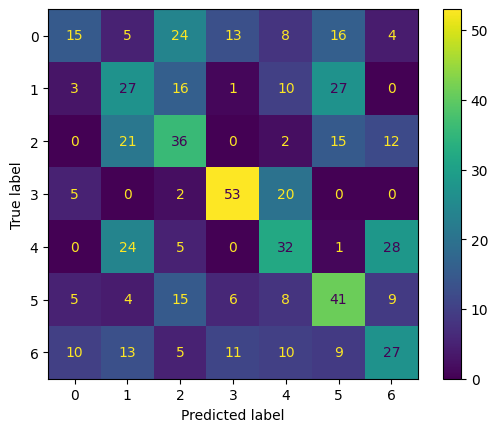

In [12]:
from sklearn.preprocessing import minmax_scale

# Flattening PCA and LDA training sets
def flatten_data(data):
    return [list(data[i]) + list(data[i+1]) + list(data[i+2]) for i in range(0, len(data), 3)]

pca_train_flattened = flatten_data(pca_train)
lda_train_flattened = flatten_data(lda_train)
pca_test_flattened = flatten_data(pca_test)
lda_test_flattened = flatten_data(lda_test)

# residuals for PCA and LDA
def calculate_residuals(test_data, train_data):
    return [np.sum(np.power(np.array(test_data[i]) - np.array(train_data), 2), axis=1) for i in range(len(test_data))]

pca_res = calculate_residuals(pca_test_flattened, pca_train_flattened)
lda_res = calculate_residuals(lda_test_flattened, lda_train_flattened)

# Normalizing residuals
pca_norm = pd.DataFrame(minmax_scale(pca_res, feature_range=(0, 1), axis=1, copy=True))
lda_norm = pd.DataFrame(minmax_scale(lda_res, feature_range=(0, 1), axis=1, copy=True))

# combined scores
lda_pca = (pca_norm + lda_norm) / 2

#  target values for training and testing
train_target_acc = pd.DataFrame([train_acc_df['target'].iloc[i] for i in range(0, len(train_acc_df), 3)])
test_target_acc = pd.DataFrame([test_acc_df['target'].iloc[i] for i in range(0, len(test_acc_df), 3)])

# Maping LDA_PCA to target values
target_pca_lda = [train_target_acc.iloc[np.argmin(lda_pca.iloc[i])][0] for i in range(len(lda_pca))]
label_pca_lda = [test_target_acc.iloc[i][0] for i in range(len(lda_pca))]

label = pd.DataFrame(label_pca_lda)
target = pd.DataFrame(target_pca_lda)

# results
print("F1 score:", metrics.f1_score(label, target, average=None))
cm = metrics.confusion_matrix(label, target)

weighted_f1_score = metrics.f1_score(label, target, average='weighted')
print("Weighted Average F1 Score:", weighted_f1_score)

print("Confusion matrix:\n", cm)
metrics.ConfusionMatrixDisplay(cm).plot()


<a id='task2'></a>
<div class=" alert alert-warning">
<p> <b>2.2</b> Use PCA and LDA transformations to reduce the dimensionality of depth images. You should also standardize the values to zero mean and unit variance before the transformations. Fit PCA and LDA for all training images (12x16, 192-dimensional in vectorized form) by choosing 5-dimensional subspace for both PCA and LDA. Transform both train and test examples to this low-dimensional feature representation. Concatenate each sequence to single vector size of 5x1x(5+5). Similar to task 2.1, do the PCA and LDA fusion using NN and evaluate the performance on testset. Show confusion matrix and F1 scores of the results. </p>

Note: Standardize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes (The expected F1 score for this task should generally fall within the range of 40 to 50)
    
</div>

In [13]:
train_dc = pd.DataFrame(train.drop(columns=['sensor_code_x', 'sensor_x', 'df_x', 'sensor_code_y', 'sensor_y']))
train_dc.rename(columns={'df_y':'df'}, inplace=True)

test_dc = pd.DataFrame(test.drop(columns=['sensor_code_y', 'sensor_y', 'df_x', 'sensor_code_x', 'sensor_x']))
test_dc.rename(columns={'df_y':'df'}, inplace=True)


In [14]:
# 2.2

### Your code begins here ###

# Train df
train_dc_df = pd.concat([pd.DataFrame(stats.zscore(train_dc['df'].iloc[i], axis=1)).assign(target=train_dc.iloc[i]['exercise_id']) for i in range(len(train_dc['df']))], axis=0)

# Test df
test_dc_df = pd.concat([pd.DataFrame(stats.zscore(test_dc['df'].iloc[i], axis=1)).assign(target=test_dc.iloc[i]['exercise_id']) for i in range(len(test_dc['df']))], axis=0)

# PCA and LDA on training and testing data
pca = PCA(n_components=5)
lda = LinearDiscriminantAnalysis(n_components=5)

pca_train = pca.fit_transform(train_dc_df.drop('target', axis=1))
lda_train = lda.fit_transform(train_dc_df.drop('target', axis=1), train_dc_df['target'])
pca_test = pca.transform(test_dc_df.drop('target', axis=1))
lda_test = lda.transform(test_dc_df.drop('target', axis=1))

# lengths of PCA training and testing sets
print(len(pca_train))
print(len(pca_test))



7430
2990


F1 score: [0.8313253  0.52910053 0.54216867 0.91275168 1.         0.49152542
 0.73684211]
Weighted Average F1 Score: 0.7201330293221444
Confusion matrix:
 [[69 15  1  0  0  0  0]
 [ 0 50 34  0  0  0  0]
 [ 0 40 45  1  0  0  0]
 [12  0  0 68  0  0  0]
 [ 0  0  0  0 90  0  0]
 [ 0  0  0  0  0 29 59]
 [ 0  0  0  0  0  1 84]]


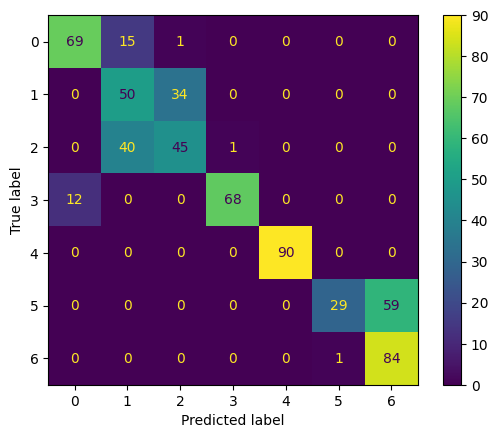

In [15]:
# Flattening PCA and LDA training sets
pca_train_flattened = [list(np.concatenate(pca_train[i:i+5])) for i in range(0, len(pca_train), 5)]
lda_train_flattened = [list(np.concatenate(lda_train[i:i+5])) for i in range(0, len(lda_train), 5)]

# Flattening PCA and LDA testing sets
pca_test_flattened = [list(np.concatenate(pca_test[i:i+5])) for i in range(0, len(pca_test), 5)]
lda_test_flattened = [list(np.concatenate(lda_test[i:i+5])) for i in range(0, len(lda_test), 5)]

# residuals for PCA and LDA
pca_res = [np.sum(np.power(np.array(pca_test_flattened[i]) - np.array(pca_train_flattened), 2), axis=1) for i in range(len(pca_test_flattened))]
lda_res = [np.sum(np.power(np.array(lda_test_flattened[i]) - np.array(lda_train_flattened), 2), axis=1) for i in range(len(lda_test_flattened))]

# Normalized residuals
pca_norm = pd.DataFrame(minmax_scale(pca_res, feature_range=(0, 1), axis=1, copy=True))
lda_norm = pd.DataFrame(minmax_scale(lda_res, feature_range=(0, 1), axis=1, copy=True))

# Combined normalized residuals
lda_pca = (pca_norm + lda_norm) / 2

# target values for training and testing
train_target_dc = pd.DataFrame([train_dc_df['target'].iloc[i] for i in range(0, len(train_dc_df), 5)])
test_target_dc = pd.DataFrame([test_dc_df['target'].iloc[i] for i in range(0, len(test_dc_df), 5)])

# Maping LDA_PCA to target values
target_pca_lda = [train_target_dc.iloc[np.argmin(lda_pca.iloc[i])][0] for i in range(len(lda_pca))]
label_pca_lda = [test_target_dc.iloc[i][0] for i in range(len(lda_pca))]

label = pd.DataFrame(label_pca_lda)
target = pd.DataFrame(target_pca_lda)

# Evaluate and display results
print("F1 score:", metrics.f1_score(label, target, average=None))
cm = metrics.confusion_matrix(label, target)

weighted_f1_score = metrics.f1_score(label, target, average='weighted')
print("Weighted Average F1 Score:", weighted_f1_score)
print("Confusion matrix:\n", cm)
metrics.ConfusionMatrixDisplay(cm).plot()


# 3. Feature extraction and feature-level fusion for multimodal classification

<a id='task3'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 3.</b>

Prepare new feature sets for each modality and combine them to single feature representation. Compare two classifiers from scikit-learn. Train classifiers using joint feature presentation. Evaluate and compare the result using testing dataset. Do the subtasks given as
<br>   

<p> <b>3.1</b> Similar to task 2.1, calculate PCA for accelerometer, but choose now the 10 largest principal components as 10-dim feature vector for each window. In addition, for each window calculate mean and standard deviation of each three acc channels as statistical features, resulting 6-dimensional vector. Combine these to 36-dimensional final feature vector.</p>

Document your work.
    
</div>

In [16]:
# 3.1

### Your code begins here ###
#  mean and standard deviation for training and testing data
train_acc_df['mean'], test_acc_df['mean'] = np.mean(train_acc_df.drop(['target'], axis=1), axis=1), np.mean(test_acc_df.drop(['target'], axis=1), axis=1)
train_acc_df['std'], test_acc_df['std'] = np.std(train_acc_df.drop(['target'], axis=1), axis=1), np.std(test_acc_df.drop(['target'], axis=1), axis=1)

# Reseting index and drop unnecessary columns
train_acc_df[['mean', 'std']] = train_acc_df[['mean', 'std']].reset_index(drop=True)
test_acc_df[['mean', 'std']] = test_acc_df[['mean', 'std']].reset_index(drop=True)

# PCA to calculate principal components
pca = PCA(n_components=10)
pca_train = pca.fit_transform(train_acc_df.drop(['mean', 'std', 'target'], axis=1))
pca_test = pca.transform(test_acc_df.drop(['mean', 'std', 'target'], axis=1))

# lengths of PCA training data and its components
print("Length of PCA training data:", len(pca_train))
print("Length of PCA components:", len(pca_train[0]))

# Transforming PCA results into DataFrames
pca_train, pca_test = pd.DataFrame(pca_train), pd.DataFrame(pca_test)

# Combined mean and standard deviation columns
pca_train[['mean', 'std']] = train_acc_df[['mean', 'std']].values
pca_test[['mean', 'std']] = test_acc_df[['mean', 'std']].values

# Concatenating 36-dimensional vectors for training and testing data
pca_train_concat_acc = [np.concatenate([pca_train.iloc[i], pca_train.iloc[i+1], pca_train.iloc[i+2]], axis=0) for i in range(0, len(pca_train), 3)]
pca_test_concat_acc = [np.concatenate([pca_test.iloc[i], pca_test.iloc[i+1], pca_test.iloc[i+2]], axis=0) for i in range(0, len(pca_test), 3)]

# DataFrames for concatenated vectors
df_acc_vector_train, df_acc_vector_test = pd.DataFrame(pca_train_concat_acc), pd.DataFrame(pca_test_concat_acc)
print("The dimension of final feature vector:", len(pca_test_concat_acc[0]))




Length of PCA training data: 4458
Length of PCA components: 10
The dimension of final feature vector: 36


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.2</b> Similar to task 2.2, calculate the PCA for depth images using same setup, but now choose the 10 largest principal components as feature vector. Concatenate the image sequence forming 50-dimensional feature vector from each windowed example.</p>

Document your work.
    
</div>

In [17]:
# 3.2


### Your code begins here ###
#  PCA to train and test datasets for depth camera
pca = PCA(n_components=10)
pca_train_dc = pd.DataFrame(pca.fit_transform(train_dc_df.drop(['target'], axis=1)))
pca_test_dc = pd.DataFrame(pca.transform(test_dc_df.drop(['target'], axis=1)))

# dimensions of PCA results
print("Length of PCA training data:", len(pca_train_dc))
print("Length of PCA components:", len(pca_train_dc.iloc[0]))

# Converting PCA results to DataFrames
pca_train_dc = pd.DataFrame(pca_train_dc)
pca_test_dc = pd.DataFrame(pca_test_dc)

# 50-dimensional concatenated vectors for PCA training data with depth camera
pca_train_concat_dc = [np.concatenate([pca_train_dc.iloc[i+j] for j in range(5)], axis=0) for i in range(0, len(pca_train_dc), 5)]

# lengths of the first vector in the concatenated set
print("The dimension of final feature vector:", len(pca_train_concat_dc[0]))


Length of PCA training data: 7430
Length of PCA components: 10
The dimension of final feature vector: 50


In [18]:
# 50-dimensional concatenated vectors for PCA test data with depth camera
pca_test_concat_dc = [np.concatenate([pca_test_dc.iloc[i+j] for j in range(5)], axis=0) for i in range(0, len(pca_test_dc), 5)]

# lengths of the first vector in the concatenated set
print("the length of the first vector in the concatenated set: ", len(pca_test_concat_dc))

# dataframes for concatenated vectors from PCA train and test data with depth camera
df_dc_vector_train = pd.DataFrame([np.concatenate([pca_train_dc.iloc[i+j] for j in range(5)], axis=0) for i in range(0, len(pca_train_dc), 5)])
df_dc_vector_test = pd.DataFrame([np.concatenate([pca_test_dc.iloc[i+j] for j in range(5)], axis=0) for i in range(0, len(pca_test_dc), 5)])

# lengths of the train dataframe
print("the length of the train dataframe: ", len(df_dc_vector_train))


the length of the first vector in the concatenated set:  598
the length of the train dataframe:  1486


<a id='task3'></a>
<div class=" alert alert-warning">

<p> <b>3.3</b> Form a joint feature presentation of features extracted in 3.1 and 3.2, resulting 86-dimensional feature vector for each example. Normalize data between 0-1 using the training dataset. Use support vector machine (SVM) with RBF-kernel and Gaussian naiveBayes classifier (use default parameter values for both classifiers). Train the classifiers and evaluate and compare classifiers on testset using confusion matrices and F1 scores.</p>

Note: Normalize the data along each axis.
<br>

Document your work, evaluate the results, and analyse the outcomes. (The expected F1 score for this task should generally fall within the range of 55 to 70)
    
</div>

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


F1 score for SVM: [0.68926554 0.57861635 0.42735043 0.84782609 1.         0.69064748
 0.68333333]
Weighted Average F1 Score for SVM: 0.7033944476013922
Confusion matrix for SVM:
 [[61  0  0 24  0  0  0]
 [ 1 46  6  2  0  0 29]
 [28 29 25  0  0  0  4]
 [ 2  0  0 78  0  0  0]
 [ 0  0  0  0 90  0  0]
 [ 0  0  0  0  0 48 40]
 [ 0  0  0  0  0  3 82]]
F1 score for Gaussian Naive Bayes: [0.18300654 0.24137931 0.49785408 0.44067797 0.72340426 0.75428571
 0.74125874]
Weighted Average F1 Score for Gaussian Naive Bayes: 0.515705057523901
Confusion matrix for Gaussian Naive Bayes:
 [[14 24 12 35  0  0  0]
 [ 9 21 54  0  0  0  0]
 [ 0 28 58  0  0  0  0]
 [41  0  0 39  0  0  0]
 [ 4 16  0 13 51  2  4]
 [ 0  0 21  0  0 66  1]
 [ 0  1  2 10  0 19 53]]


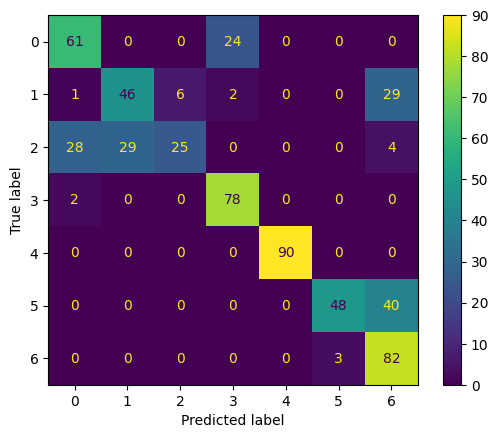

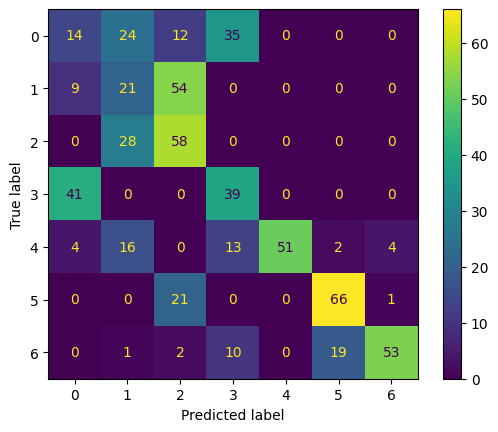

In [19]:
# 3.3
### Your code begins here ###
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Concatenating acc and dc vectors into a dataframe for training
acc_dc_full_train = pd.concat([pd.concat([df_acc_vector_train.iloc[i], df_dc_vector_train.iloc[i]], axis=0) for i in range(len(df_dc_vector_train))], axis=1).transpose()

# Concatenating acc and dc vectors into a dataframe for testing
acc_dc_full_test = pd.concat([pd.concat([df_acc_vector_test.iloc[i], df_dc_vector_test.iloc[i]], axis=0) for i in range(len(df_dc_vector_test))], axis=1).transpose()

# Normalizing the data
normalized_full_train = pd.DataFrame(minmax_scale(acc_dc_full_train, feature_range=(0, 1), axis=1, copy=True))
normalized_full_test = pd.DataFrame(minmax_scale(acc_dc_full_test, feature_range=(0, 1), axis=1, copy=True))

# SVM classifier
clf = SVC(kernel='rbf').fit(normalized_full_train, train_target_dc)
predicted = clf.predict(normalized_full_test)

# performance of the SVM
f1_score_svm = metrics.f1_score(test_target_dc, predicted, average=None)
print("F1 score for SVM:", f1_score_svm)
weighted_f1_score_svm = metrics.f1_score(test_target_dc, predicted, average='weighted')
print("Weighted Average F1 Score for SVM:", weighted_f1_score_svm)
print("Confusion matrix for SVM:\n", metrics.confusion_matrix(test_target_dc, predicted))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(test_target_dc, predicted)).plot()

# Training a Gaussian Naive Bayes classifier
gnb = GaussianNB().fit(normalized_full_train, np.ravel(train_target_dc))
predicted_gnb = gnb.predict(normalized_full_test)

# performance of the Gaussian Naive Bayes
f1_score_gnb = metrics.f1_score(test_target_dc, predicted_gnb, average=None)
print("F1 score for Gaussian Naive Bayes:", f1_score_gnb)
weighted_f1_score_gnb = metrics.f1_score(test_target_dc, predicted_gnb, average='weighted')
print("Weighted Average F1 Score for Gaussian Naive Bayes:", weighted_f1_score_gnb)
print("Confusion matrix for Gaussian Naive Bayes:\n", metrics.confusion_matrix(test_target_dc, predicted_gnb))
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(test_target_dc, predicted_gnb)).plot()



# 4. Decision-level fusion for multimodal classification

<a id='task4'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 4.</b>

Use features calculated for each modality in task 3. Choose base classifier for each modality from scikit-learn. Train classifiers for each modality feature presentations separately and combine the outputs in decision level. Evaluate and compare the result on testing dataset. Do the subtasks given as
<br>
<br>
<p> <b>4.1</b> Use base classifiers of support vector machine (SVM) with RBF-kernel and AdaBoost classifier (with random_state=0).
Normalize data between 0-1 using the training dataset. Train the base classifiers by tuning the model parameters (<i>C</i> parameter and RBF-kernel <i>gamma</i> in SVM as well as <i>n_estimators</i> and <i>learning_rate</i> in Adaboost) using 10-fold cross-validation on training dataset to find optimal set of parameters (hint: use GridSearchCV from scikit-learn). For grid search use the following values $C = [0.1, 1.0, 10.0, 100.0]$, $gamma=[0.1, 0.25, 0.5, 0.75, 1.0, 2.0]$, $n\_estimators = [50, 100, 500, 1000]$, and $learning\_rate = [0.1, 0.25, 0.5, 0.75,1.0]$.<br>
Choose the best parameters and train the classifiers for each modality on whole training dataset. Is there a possibility that classifiers will overfit to training data using this parameter selection strategy? If so, why? </p>

Note: Normalize the data along each axis.
<br>

Document your work, answer the given question, evaluate the results, and analyse the outcomes.
    
</div>

In [20]:
# 4.1

### Your code begins here ###
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import MinMaxScaler

# Normalizing the data along each axis
scaler = MinMaxScaler()
normalized_full_train = pd.DataFrame(scaler.fit_transform(acc_dc_full_train))
normalized_full_test = pd.DataFrame(scaler.transform(acc_dc_full_test))

# parameter grids for SVM
svm_param_grid = {'C': [0.1, 1.0, 10.0, 100.0], 'gamma': [0.1, 0.25, 0.5, 0.75, 1.0, 2.0]}

# parameter grids for AdaBoost
adaboost_param_grid = {'n_estimators': [50, 100, 500, 1000], 'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0]}

#  SVM classifier and  GridSearchCV
svm_classifier = SVC(kernel='rbf')
svm_grid_search = GridSearchCV(svm_classifier, svm_param_grid, cv=10, scoring='f1_weighted', n_jobs=-1)
svm_grid_search.fit(normalized_full_train, train_target_dc)

#  AdaBoost classifier and  GridSearchCV
adaboost_classifier = AdaBoostClassifier(random_state=0)
adaboost_grid_search = GridSearchCV(adaboost_classifier, adaboost_param_grid, cv=10, scoring='f1_weighted', n_jobs=-1)
adaboost_grid_search.fit(normalized_full_train, train_target_dc)

# best parameters for SVM and AdaBoost
print("Best parameters for SVM:", svm_grid_search.best_params_)
print("Best parameters for AdaBoost:", adaboost_grid_search.best_params_)

#  SVM and AdaBoost classifiers with the best parameters on the entire training dataset
svm_classifier_best_params = SVC(kernel='rbf', C=svm_grid_search.best_params_['C'], gamma=svm_grid_search.best_params_['gamma'])
svm_classifier_best_params.fit(normalized_full_train, train_target_dc)

adaboost_classifier_best_params = AdaBoostClassifier(n_estimators=adaboost_grid_search.best_params_['n_estimators'],
                                                     learning_rate=adaboost_grid_search.best_params_['learning_rate'],
                                                     random_state=0)
adaboost_classifier_best_params.fit(normalized_full_train, train_target_dc)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best parameters for SVM: {'C': 1.0, 'gamma': 0.5}
Best parameters for AdaBoost: {'learning_rate': 0.75, 'n_estimators': 1000}


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(learning_rate=0.75, n_estimators=1000, random_state=0)

<a id='task4'></a>
<div class=" alert alert-warning">


<p> <b>4.2</b> Predict probabilistic outputs of each trained classifier for both modalities using the test set. </p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

In [21]:
# 4.2

### Your code begins here ###
from sklearn.calibration import CalibratedClassifierCV
# Initialize SVM classifier with probability estimates
svm_classifier_best_params = SVC(kernel='rbf', C=svm_grid_search.best_params_['C'], gamma=svm_grid_search.best_params_['gamma'], probability=True)

# Train SVM classifier with the best parameters on the entire training dataset
svm_classifier_best_params.fit(normalized_full_train, train_target_dc)


# Predict probabilistic outputs for SVM Classifier (Accelerometer)
svm_probabilities_acc = svm_classifier_best_params.predict_proba(normalized_full_test)

# Predict probabilistic outputs for AdaBoost Classifier (Accelerometer)
adaboost_probabilities_acc = adaboost_classifier_best_params.predict_proba(normalized_full_test)

# Calibrate the classifiers to get well-calibrated probabilities
calibrated_svm_acc = CalibratedClassifierCV(svm_classifier_best_params, method='sigmoid', cv='prefit')
calibrated_svm_acc.fit(normalized_full_train, train_target_dc)
svm_probabilities_acc_calibrated = calibrated_svm_acc.predict_proba(normalized_full_test)

calibrated_adaboost_acc = CalibratedClassifierCV(adaboost_classifier_best_params, method='sigmoid', cv='prefit')
calibrated_adaboost_acc.fit(normalized_full_train, train_target_dc)
adaboost_probabilities_acc_calibrated = calibrated_adaboost_acc.predict_proba(normalized_full_test)

# Predict probabilistic outputs for SVM Classifier (Depth)
svm_probabilities_depth = svm_classifier_best_params.predict_proba(normalized_full_test)

# Predict probabilistic outputs for AdaBoost Classifier (Depth)
adaboost_probabilities_depth = adaboost_classifier_best_params.predict_proba(normalized_full_test)

# Calibrate the classifiers to get well-calibrated probabilities
calibrated_svm_depth = CalibratedClassifierCV(svm_classifier_best_params, method='sigmoid', cv='prefit')
calibrated_svm_depth.fit(normalized_full_train, train_target_dc)
svm_probabilities_depth_calibrated = calibrated_svm_depth.predict_proba(normalized_full_test)

calibrated_adaboost_depth = CalibratedClassifierCV(adaboost_classifier_best_params, method='sigmoid', cv='prefit')
calibrated_adaboost_depth.fit(normalized_full_train, train_target_dc)
adaboost_probabilities_depth_calibrated = calibrated_adaboost_depth.predict_proba(normalized_full_test)

### Your code ends here ###


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a id='task4'></a>
<div class=" alert alert-warning">
<p> <b>4.3</b> Combine the probabilistic outputs of different modalities by fixed classification rules: max, min, prod, and sum. Evaluate, compare, and analyse the final combined results using confusion matrices and F1 scores. Show results for each base classifier combinations (i.e., $SVM_{acc}+SVM_{depth}$, $AdaBoost_{acc}+AdaBoost_{depth}$, $SVM_{acc}+AdaBoost_{depth}$, $AdaBoost_{acc}+SVM_{depth}$)</p>
<br>
Document your work, evaluate the results, and analyse the outcomes.
    
</div>

In [22]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder

# Function to combine probabilistic outputs using fixed classification rules
def combine_probabilistic_outputs(rule, probabilities_acc, probabilities_depth):
    if rule == 'max':
        combined_probabilities = np.maximum(probabilities_acc, probabilities_depth)
    elif rule == 'min':
        combined_probabilities = np.minimum(probabilities_acc, probabilities_depth)
    elif rule == 'prod':
        combined_probabilities = probabilities_acc * probabilities_depth
    elif rule == 'sum':
        combined_probabilities = probabilities_acc + probabilities_depth
    else:
        raise ValueError("Invalid combination rule. Choose from 'max', 'min', 'prod', or 'sum'.")

    return combined_probabilities

# Encode string labels to numeric labels
label_encoder = LabelEncoder()
test_target_dc_encoded = label_encoder.fit_transform(test_target_dc)

# Evaluate and compare results for each combination
combination_rules = ['max', 'min', 'prod', 'sum']

for rule in combination_rules:
    # Combine probabilistic outputs for SVM and AdaBoost classifiers for accelerometer
    combined_probabilities_acc = combine_probabilistic_outputs(rule, svm_probabilities_acc_calibrated, adaboost_probabilities_acc_calibrated)

    # Combine probabilistic outputs for SVM and AdaBoost classifiers for depth
    combined_probabilities_depth = combine_probabilistic_outputs(rule, svm_probabilities_depth_calibrated, adaboost_probabilities_depth_calibrated)

    # Combine overall probabilistic outputs
    combined_probabilities = combine_probabilistic_outputs(rule, combined_probabilities_acc, combined_probabilities_depth)

    # Predict labels based on the combined probabilistic outputs
    predicted_labels = np.argmax(combined_probabilities, axis=1)

    # Evaluate the performance
    f1 = f1_score(test_target_dc_encoded, predicted_labels, average='weighted')
    confusion_mat = confusion_matrix(test_target_dc_encoded, predicted_labels)

    # Print and analyze results
    print(f"Combination Rule: {rule}")
    print(f"F1 Score: {f1}")
    print(f"Confusion Matrix:\n{confusion_mat}")
    print("\n")


Combination Rule: max
F1 Score: 0.657488375609491
Confusion Matrix:
[[85  0  0  0  0  0  0]
 [36 39  4  5  0  0  0]
 [45 37  0  3  0  0  1]
 [ 2  0  0 78  0  0  0]
 [ 0  0  0  4 86  0  0]
 [ 0  0  0  0  0 55 33]
 [ 0  0  0  0  0  5 80]]


Combination Rule: min
F1 Score: 0.6723980261504987
Confusion Matrix:
[[81  1  0  3  0  0  0]
 [13 51  4 16  0  0  0]
 [ 4 54  0 28  0  0  0]
 [ 2  0  0 78  0  0  0]
 [ 0  0  0  3 87  0  0]
 [ 0  0  0  0  0 55 33]
 [ 0  0  0  0  0  5 80]]


Combination Rule: prod
F1 Score: 0.6522429804768844
Confusion Matrix:
[[85  0  0  0  0  0  0]
 [28 39  4 13  0  0  0]
 [ 8 50  0 28  0  0  0]
 [ 2  0  0 78  0  0  0]
 [ 0  0  0  5 85  0  0]
 [ 0  0  0  0  0 55 33]
 [ 0  0  0  0  0  5 80]]


Combination Rule: sum
F1 Score: 0.657488375609491
Confusion Matrix:
[[85  0  0  0  0  0  0]
 [36 39  4  5  0  0  0]
 [45 37  0  3  0  0  1]
 [ 2  0  0 78  0  0  0]
 [ 0  0  0  4 86  0  0]
 [ 0  0  0  0  0 55 33]
 [ 0  0  0  0  0  5 80]]




/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# 5. Bonus task: Multimodal biometric identification of persons (optional)

<a id='task5'></a>
<div class=" alert alert-warning">
    <b>Assigment.</b> <b>Task 5.</b>

Can you build a classifier that recognizes the person who is performing the exercise? Use same 10 person dataset and split it so that first 25% of each long exercise sequence is used for training and rest 75% of each sequence is used for testing the classifier. Use same 5 second windowing with 3 seconds overlap to prepare the examples. Note that, now the person identity is the class label instead of exercise type. Max. 10 points are given but you can earn points from partial solution, as well.
<br>
<br>
<p> <b>5.1</b> Build a classifier to identify persons based on the features and one of the models given in task 4 (max. 5 points).</p>
<br>
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

<a id='task5'></a>
<div class=" alert alert-warning">

<p> <b>5.2</b> Can you build your own solution (using new features, new classification model or different fusion approaches) to beat the approach in Task 5.1 ? (max. 5 points) </p>
<br>  
Document your work. Evaluate and compare the results using confusion matrix and F1 score.

</div>

In [ ]:
# 5.2

### Your code begins here ###

### Your code ends here ###